Bar chart of the Total Area of Temporary Crops by Year (of all Freguesias in Portugal):

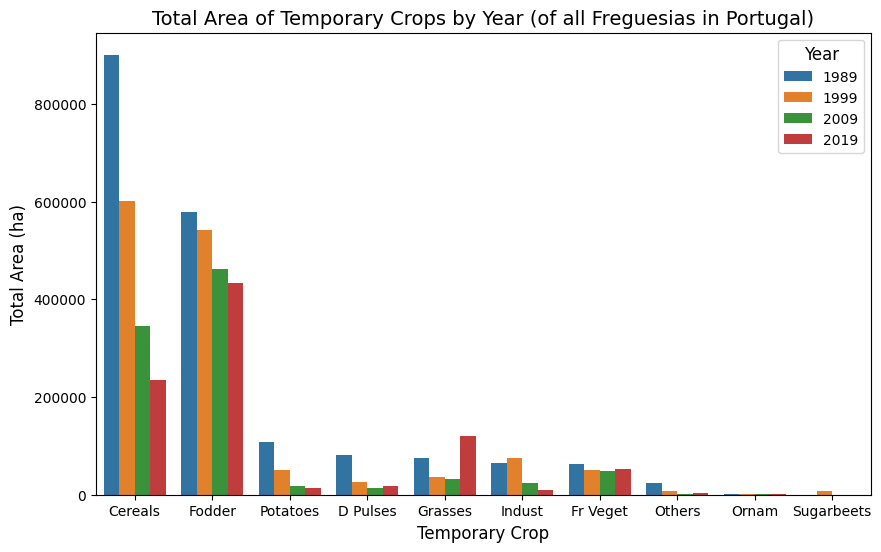

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
data = pd.read_csv('3_temp_crops.csv')

# Rename the columns
data.rename(columns={'Area_1989': '1989'}, inplace=True)
data.rename(columns={'Area_1999': '1999'}, inplace=True)
data.rename(columns={'Area_2009': '2009'}, inplace=True)
data.rename(columns={'Area_2019': '2019'}, inplace=True)

# Group the data by crop and calculate the total area for each crop
crop_totals_1989 = data.groupby('Temp_crop')[['1989', '1999', '2009', '2019']].sum().reset_index()

# Sort the data by total area in descending order
crop_totals_1989 = crop_totals_1989.sort_values('1989', ascending=False)

# Create custom abbreviations for x-axis labels
abbreviations = ['Cereals', 'Fodder', 'Potatoes', 'D Pulses', 'Grasses', 'Indust', 'Fr Veget', 'Others', 'Ornam', 'Sugarbeets']  # Update with desired abbreviations

# Add the abbreviations as a new column in crop_totals DataFrame
crop_totals_1989['Abbreviation'] = abbreviations

# Melt the data to convert the year columns into a single 'Year' column
melted_data = pd.melt(crop_totals_1989, id_vars=['Temp_crop', 'Abbreviation'], var_name='Year', value_name='Total_Area')

# Create a bar chart to visualize the total area for each crop over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='Temp_crop', y='Total_Area', hue='Year', data=melted_data)
plt.xlabel('Temporary Crop', fontsize=12)
plt.ylabel('Total Area (ha)', fontsize=12)
plt.title('Total Area of Temporary Crops by Year (of all Freguesias in Portugal)', fontsize=14)
plt.xticks(range(len(crop_totals_1989)), abbreviations, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Year', fontsize=10, title_fontsize=12, loc='upper right')
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of the regions
regions_shapefile = "Cont_AAD_CAOP2017.shp"
regions_data = gpd.read_file(regions_shapefile)

# List of region names
region_names = ["Region A", "Region B", "Region C"]

# Filter the regions based on the region names
filtered_regions = regions_data[regions_data["region_name"].isin(region_names)]

# Plot the filtered regions
fig, ax = plt.subplots(figsize=(10, 10))
filtered_regions.plot(ax=ax, edgecolor='black', linewidth=1)

# Add title and show the map
ax.set_title("Map of Selected Regions")
plt.show()